# Rise time prediction of Servo Motor base Motor type, screw type, Power gain of motor and voltage gain of motor 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Importing Dataset 

In [2]:
dataset = pd.read_csv('Servodata.csv')
dataset.index = dataset.index+1
dataset

,Motor,Screw,Pgain,Vgain,Rise Time
1,E,E,5,4,0.281251
2,B,D,6,5,0.506252
3,D,D,4,3,0.356251
4,B,A,3,2,5.500033
5,D,B,6,5,0.356251
...,...,...,...,...,...
163,B,C,3,2,4.499986
164,B,E,3,1,3.699967
165,C,D,4,3,0.956256
166,A,B,3,2,4.499986


# Average Power Gain, Voltage Gain, Rise Time

In [3]:
dataset.describe()

,Pgain,Vgain,Rise Time
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,1.389708
std,1.017770,1.369850,1.559635
min,3.000000,1.000000,0.131250
25%,3.000000,1.000000,0.503126
50%,4.000000,2.000000,0.731254
75%,5.000000,4.000000,1.259369
max,6.000000,5.000000,7.100108


# Splitting the Dataset into Train and Test Set

In [4]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[: , -1].values

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Data Preprocessing 

## Label Encoding

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_train[:, 0] = le.fit_transform(X_train[:, 0])
X_train[:, 1] = le.fit_transform(X_train[:, 1])

### Label Encoding Results

### Motor
### C=2, E=4, A=0, B=1, D=3

### Screw
### A=0, B=1, C=2, E=4, D=3

## Taking care of missing values

In [7]:
y_train = y_train.reshape(len(y_train),1)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.nan, strategy = 'mean')
imputer_y = SimpleImputer(missing_values= np.nan, strategy = 'mean')
imputer.fit(X_train[:, 0:4])
imputer_y.fit(y_train)
X_train[:, 0:4] = imputer.transform(X_train[:, 0:4])
y_train = imputer_y.transform(y_train)

## Scaling Dataset

In [8]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_train[:, 2:4] = sc_x.fit_transform(X_train[:,2:4])
y_train = sc_y.fit_transform(y_train)

## Applying Decision Tree Regressor  Model

In [9]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

# Testing the Test Set

## Preprocessing the Test Data according to the Training Set

In [10]:
y_test = y_test.reshape(len(y_test),1)
X_test[:, 0] = le.transform(X_test[:, 0])
X_test[:, 1] = le.transform(X_test[:, 1])
X_test[:, 0:4] = imputer.transform(X_test[:, 0:4])
y_test = imputer_y.transform(y_test)

## Scaling the data according to the training set

In [11]:
X_test[:, 2:4] = sc_x.transform(X_test[:, 2:4])

# Evaluating the model using R-square method

In [12]:
y_pred = model.predict(X_test)
y_pred = sc_y.inverse_transform(y_pred)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9828791262471592

# Visualising the Predicted result and Actual result side by side

In [13]:
np.set_printoptions(precision = 2)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[0.81 0.81]
 [0.84 0.88]
 [1.5  1.3 ]
 [0.36 0.58]
 [0.39 0.51]
 [5.1  4.5 ]
 [5.5  5.7 ]
 [0.92 0.81]
 [0.92 0.84]
 [0.54 0.54]
 [0.51 0.73]
 [0.47 0.24]
 [0.92 0.99]
 [4.7  4.5 ]
 [0.51 0.51]
 [0.99 1.03]
 [0.58 0.36]
 [0.58 0.43]
 [4.3  3.9 ]
 [0.7  0.9 ]
 [1.5  1.3 ]
 [0.69 1.18]
 [0.99 0.88]
 [4.7  4.5 ]
 [1.11 1.14]
 [0.5  0.7 ]
 [5.1  5.3 ]
 [3.7  3.9 ]
 [0.47 0.24]
 [0.54 0.54]
 [0.77 0.77]
 [0.39 0.43]
 [0.54 0.54]
 [0.43 0.13]]


# Visualising Error in Prediction with Graph

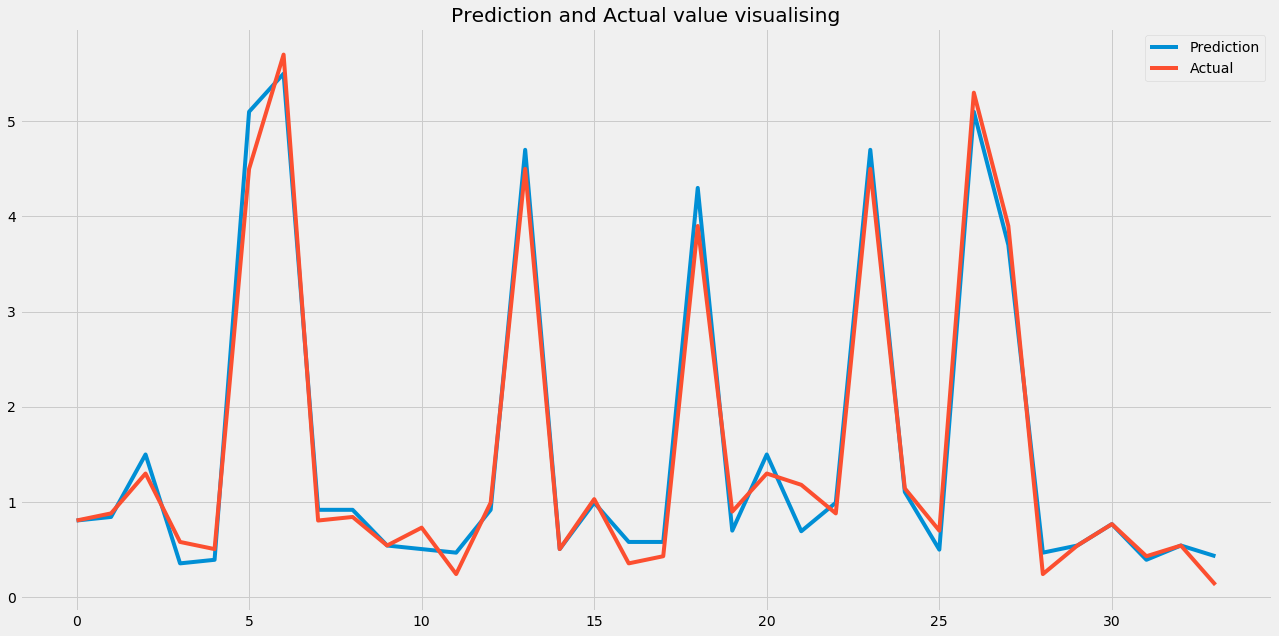

In [14]:
plt.figure(figsize=(20,10))
plt.plot(y_pred, label='Prediction')
plt.plot(y_test, label='Actual')
plt.title('Prediction and Actual value visualising')
plt.legend()
plt.show()